In [44]:
# This note book will collect the data and so some exploration
import pandas as pd
import requests
import datetime as date
import numpy as np

In [4]:
data = requests.get("https://api.tiingo.com/tiingo/daily/intc/prices?startDate=2016-01-02&token=09ea7caeb7c3feace297856973a4c119389da3a3")


In [7]:
type(data)

requests.models.Response

In [8]:
df = pd.io.json.json_normalize(data.json())

In [9]:
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-01-04T00:00:00.000Z,33.99,34.0100,33.46,33.88,27882190,30.626019,30.644040,30.148473,30.526906,27882190,0.0,1.0
1,2016-01-05T00:00:00.000Z,33.83,34.0000,33.53,33.96,16709510,30.481855,30.635030,30.211546,30.598989,16709510,0.0,1.0
2,2016-01-06T00:00:00.000Z,33.08,33.5200,32.80,33.25,25491255,29.806082,30.202535,29.553793,29.959257,25491255,0.0,1.0
3,2016-01-07T00:00:00.000Z,31.84,33.0077,31.84,32.28,37680521,28.688804,29.740937,28.688804,29.085258,37680521,0.0,1.0
4,2016-01-08T00:00:00.000Z,31.51,32.2200,31.43,32.09,29953840,28.391464,29.031196,28.319382,28.914062,29953840,0.0,1.0


In [14]:
# For this prediction will only need the following attributes: date/close/high/low/open
# First date type needs to be converted into datetime
def clean_up(data):
    #data_final=[]
    data["date"] = pd.to_datetime(data["date"])
    data_final = data[["date", "high", "low", "open", "close"]]
    return(data_final.set_index("date"))

data = clean_up(df)
data.head()

,high,low,open,close
date,,,,
2016-01-04 00:00:00+00:00,34.0100,33.46,33.88,33.99
2016-01-05 00:00:00+00:00,34.0000,33.53,33.96,33.83
2016-01-06 00:00:00+00:00,33.5200,32.80,33.25,33.08
2016-01-07 00:00:00+00:00,33.0077,31.84,32.28,31.84
2016-01-08 00:00:00+00:00,32.2200,31.43,32.09,31.51


In [17]:
# Data exploration / visualization
# check for missind data
dat = data.isnull().sum()

In [18]:
# There is no NA values
dat 

high     0
low      0
open     0
close    0
dtype: int64

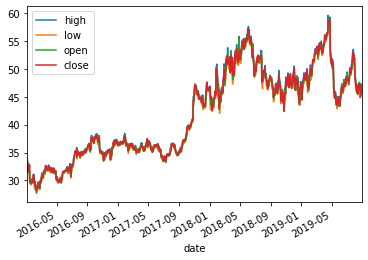

In [20]:
# Visualize the data
# Line plot
data.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000231DDA8F6D8>,
      dtype=object)

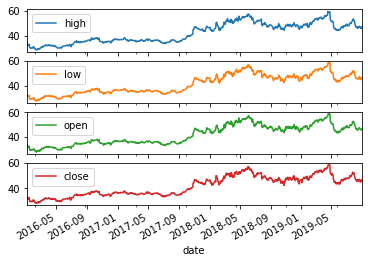

In [22]:
data.plot(subplots=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000231DDC82898>,
      dtype=object)

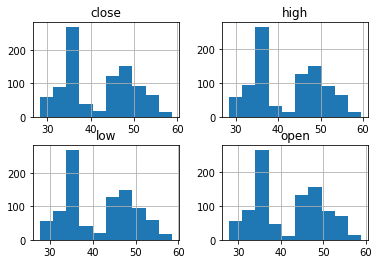

In [23]:
# Histogram and density plot
data.hist()

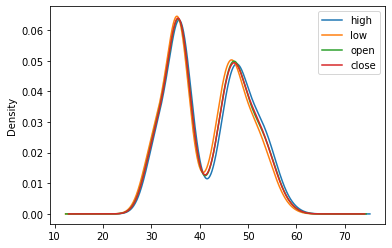

In [24]:
data.plot(kind="kde")

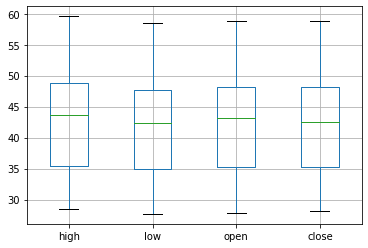

In [25]:
data.boxplot()

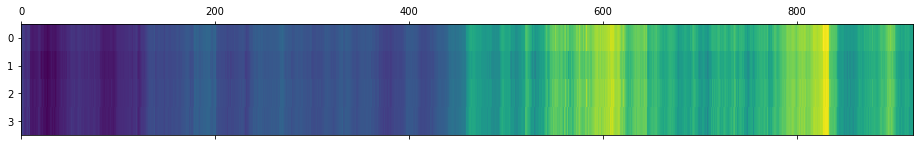

In [28]:
# Heat map
from matplotlib import pyplot
years = data.T
pyplot.matshow(years, interpolation=None, aspect='auto')

In [37]:
# Let's look for corrolation
data.corr()

,high,low,open,close
high,1.000000,0.998532,0.998968,0.998711
low,0.998532,1.000000,0.998683,0.998882
open,0.998968,0.998683,1.000000,0.997403
close,0.998711,0.998882,0.997403,1.000000


In [39]:
len(data)

921

In [64]:
x_norm_train =  data[:600]
y_norm_train = x_norm_train["close"]
x_norm_train =  x_norm_train.drop("close", axis=1)
x_norm_train =  x_norm_train.to_numpy()
y_norm_train = y_norm_train.to_numpy()

In [65]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_norm_train, y_norm_train)

In [69]:
y_pred = model.predict(data[800:].drop("close", axis=1))
print('predicted response:', y_pred, sep='\n')

predicted response:
[53.24498747 53.70710892 54.18375954 53.68139992 54.46826702 54.08383566
 54.26407558 53.99317949 54.68994483 53.65651874 52.96473083 53.46953649
 53.31343313 53.04778353 53.76104485 54.35645553 54.52503643 55.67016361
 55.95321845 55.23920628 55.59400477 55.08861837 55.75678054 55.9224359
 56.16074124 56.13853514 56.83297971 59.07909586 58.40741297 58.4776296
 58.68224674 58.82794969 57.54904359 52.07421223 51.47659373 51.25355842
 51.22452968 50.69109416 51.39163328 51.00700566 50.31608935 49.78516745
 46.76910414 45.68910933 45.10169306 45.20020642 45.45054258 45.82570443
 45.29937864 43.99497493 44.57556051 44.17820843 44.02842877 44.89164361
 43.64749122 44.25533679 44.82699757 44.47556564 43.70969343 44.40870714
 44.47399143 44.90744556 45.81818815 46.95965708 46.75770213 46.37528516
 46.84624076 46.08323099 46.19972962 47.60146955 47.2124134  47.2522041
 47.45044125 47.58746594 47.08664822 48.23484256 47.67025207 48.05611104
 48.22729068 48.00400253 48.353772

In [73]:
conb = data[800:].drop(["high", "low", "open"], axis=1)
conb["predicted"] = y_pred

In [74]:
conb.head()

,close,predicted
date,,
2019-03-11 00:00:00+00:00,53.35,53.244987
2019-03-12 00:00:00+00:00,53.57,53.707109
2019-03-13 00:00:00+00:00,54.37,54.183760
2019-03-14 00:00:00+00:00,53.44,53.681400
2019-03-15 00:00:00+00:00,54.33,54.468267


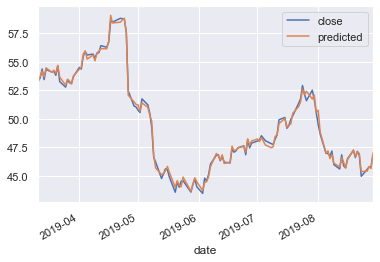

In [75]:
# plot the value
conb.plot()